In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [2]:
now = datetime.now()
ticker = "^NSEI"
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = diff.mask(diff < 0, 0)
    loss = diff.mask(diff > 0, 0).abs()
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

macd, signal_line = calculate_macd(df['Close'])
df['MACD'] = macd
df['MACD_Signal'] = signal_line

# Calculate EMA 50
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Calculate SMA 20
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Calculate Stochastic RSI
def calculate_stoch_rsi(data, window=14, k_window=3, d_window=3):
    rsi = calculate_rsi(data, window)
    min_rsi = rsi.rolling(window=window).min()
    max_rsi = rsi.rolling(window=window).max()
    stoch_rsi = (rsi - min_rsi) / (max_rsi - min_rsi)
    k_line = stoch_rsi.rolling(window=k_window).mean()
    d_line = k_line.rolling(window=d_window).mean()
    return k_line, d_line

df['StochRSI_K'], df['StochRSI_D'] = calculate_stoch_rsi(df['Close'])

df.dropna(inplace=True)
df = df.reset_index(drop=True)

C:\Users\Krish Patel\AppData\Local\Temp\ipykernel_10200\2183070477.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7856.549805,7906.950195,7817.799805,7841.899902,151900,31.099098,-93.897040,-77.050095,8043.206921,7999.342529,0.398967,0.229263
1,7849.250000,7877.500000,7825.200195,7869.500000,127000,32.987687,-89.874382,-79.614953,8035.600767,7979.220020,0.601273,0.407129
2,7831.600098,7870.350098,7812.649902,7837.000000,130600,32.850910,-87.106488,-81.113260,8027.600741,7956.027515,0.678695,0.559645
3,7883.799805,7897.100098,7832.000000,7837.149902,219800,37.019332,-79.781163,-80.846840,8021.961489,7937.190015,0.736123,0.672030
4,7942.700195,7959.299805,7879.450195,7910.600098,150300,43.227284,-68.434155,-78.364303,8018.853203,7922.680005,0.836676,0.750498


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
2427,24654.699219,24868.599609,24629.449219,24818.550781,291500,46.075050,45.639697,83.119357,24917.459882,24974.642480,0.197778,0.371172
2428,24634.900391,24791.300781,24606.199219,24728.550781,394400,41.847517,11.738546,68.843195,24906.379118,24975.134961,0.068742,0.215889
2429,24611.099609,24731.800781,24587.699219,24691.949219,303000,36.618380,-16.854595,51.703637,24894.799529,24976.709961,0.000000,0.088840
2430,24836.300781,24867.949219,24605.949219,24620.550781,308900,44.525723,-21.099787,37.142952,24892.505461,24982.772461,0.047308,0.038683
2431,24894.250000,24904.800781,24747.550781,24759.550781,365900,42.649772,-19.562610,25.801840,24892.573874,24990.769922,0.083393,0.043567


## 2. Data Exploraion & Visualization

In [5]:
df

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7856.549805,7906.950195,7817.799805,7841.899902,151900,31.099098,-93.897040,-77.050095,8043.206921,7999.342529,0.398967,0.229263
1,7849.250000,7877.500000,7825.200195,7869.500000,127000,32.987687,-89.874382,-79.614953,8035.600767,7979.220020,0.601273,0.407129
2,7831.600098,7870.350098,7812.649902,7837.000000,130600,32.850910,-87.106488,-81.113260,8027.600741,7956.027515,0.678695,0.559645
3,7883.799805,7897.100098,7832.000000,7837.149902,219800,37.019332,-79.781163,-80.846840,8021.961489,7937.190015,0.736123,0.672030
4,7942.700195,7959.299805,7879.450195,7910.600098,150300,43.227284,-68.434155,-78.364303,8018.853203,7922.680005,0.836676,0.750498
...,...,...,...,...,...,...,...,...,...,...,...,...
2427,24654.699219,24868.599609,24629.449219,24818.550781,291500,46.075050,45.639697,83.119357,24917.459882,24974.642480,0.197778,0.371172
2428,24634.900391,24791.300781,24606.199219,24728.550781,394400,41.847517,11.738546,68.843195,24906.379118,24975.134961,0.068742,0.215889
2429,24611.099609,24731.800781,24587.699219,24691.949219,303000,36.618380,-16.854595,51.703637,24894.799529,24976.709961,0.000000,0.088840


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2432, 12)

In [8]:
df.isna().sum()

Price        Ticker
Close        ^NSEI     0
High         ^NSEI     0
Low          ^NSEI     0
Open         ^NSEI     0
Volume       ^NSEI     0
RSI                    0
MACD                   0
MACD_Signal            0
EMA_50                 0
SMA_20                 0
StochRSI_K             0
StochRSI_D             0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
count,2432.000000,2432.000000,2432.000000,2432.000000,2.432000e+03,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000,2432.000000
mean,14794.623937,14871.020927,14714.340512,14803.703556,3.359914e+05,55.689895,48.534742,48.372505,14624.959943,14728.027872,0.504413,0.504454
std,5462.560368,5483.384178,5440.430412,5462.712180,1.915573e+05,17.276158,163.086025,153.957486,5381.432906,5435.658909,0.340936,0.327986
min,6970.600098,7034.200195,6825.799805,7023.649902,0.000000e+00,2.022397,-1005.837460,-848.332753,7381.636166,7170.400024,0.000000,0.000000
25%,10368.600098,10417.462402,10314.112305,10362.212402,2.140250e+05,42.807808,-42.091564,-38.208693,10356.486320,10324.699976,0.179999,0.193967
50%,12336.424805,12364.700195,12282.274902,12330.750000,2.781500e+05,55.647517,60.123340,59.219902,12071.501173,12202.829932,0.494157,0.492813
75%,18344.925293,18428.874512,18265.862305,18362.787598,4.024750e+05,68.327084,142.191205,137.257304,18097.361880,18277.322559,0.844803,0.827181
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06,100.000000,451.083428,413.985339,25066.740158,25508.082617,1.000000,1.000000


In [10]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7856.549805,7906.950195,7817.799805,7841.899902,151900,31.099098,-93.897040,-77.050095,8043.206921,7999.342529,0.398967,0.229263
1,7849.250000,7877.500000,7825.200195,7869.500000,127000,32.987687,-89.874382,-79.614953,8035.600767,7979.220020,0.601273,0.407129
2,7831.600098,7870.350098,7812.649902,7837.000000,130600,32.850910,-87.106488,-81.113260,8027.600741,7956.027515,0.678695,0.559645
3,7883.799805,7897.100098,7832.000000,7837.149902,219800,37.019332,-79.781163,-80.846840,8021.961489,7937.190015,0.736123,0.672030
4,7942.700195,7959.299805,7879.450195,7910.600098,150300,43.227284,-68.434155,-78.364303,8018.853203,7922.680005,0.836676,0.750498


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,index,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,0,7856.549805,7906.950195,7817.799805,7841.899902,151900,31.099098,-93.897040,-77.050095,8043.206921,7999.342529,0.398967,0.229263
1,1,7849.250000,7877.500000,7825.200195,7869.500000,127000,32.987687,-89.874382,-79.614953,8035.600767,7979.220020,0.601273,0.407129
2,2,7831.600098,7870.350098,7812.649902,7837.000000,130600,32.850910,-87.106488,-81.113260,8027.600741,7956.027515,0.678695,0.559645
3,3,7883.799805,7897.100098,7832.000000,7837.149902,219800,37.019332,-79.781163,-80.846840,8021.961489,7937.190015,0.736123,0.672030
4,4,7942.700195,7959.299805,7879.450195,7910.600098,150300,43.227284,-68.434155,-78.364303,8018.853203,7922.680005,0.836676,0.750498


Text(0, 0.5, 'Close price')

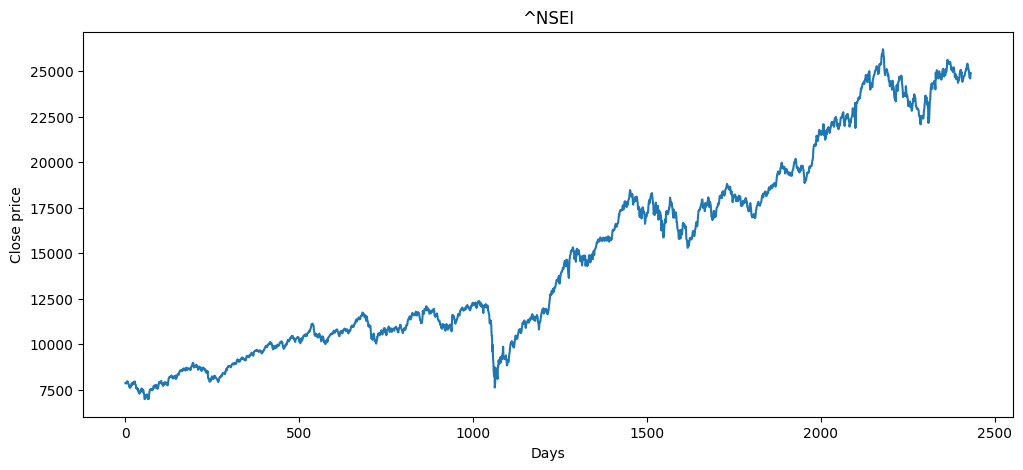

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [14]:
features = ['Open','Close', 'RSI', 'MACD', 'MACD_Signal', 'EMA_50', 'SMA_20', 'StochRSI_K', 'StochRSI_D']
data_to_process = df[features]

In [15]:
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [16]:
data_training.head()

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
0,7841.899902,7856.549805,31.099098,-93.897040,-77.050095,8043.206921,7999.342529,0.398967,0.229263
1,7869.500000,7849.250000,32.987687,-89.874382,-79.614953,8035.600767,7979.220020,0.601273,0.407129
2,7837.000000,7831.600098,32.850910,-87.106488,-81.113260,8027.600741,7956.027515,0.678695,0.559645
3,7837.149902,7883.799805,37.019332,-79.781163,-80.846840,8021.961489,7937.190015,0.736123,0.672030
4,7910.600098,7942.700195,43.227284,-68.434155,-78.364303,8018.853203,7922.680005,0.836676,0.750498


In [17]:
data_testing.head()

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
1702,17423.099609,17563.949219,67.973582,-3.689133,-60.673208,17278.475967,17199.157520,1.000000,1.000000
1703,17622.849609,17576.300781,63.306576,16.799915,-45.178583,17290.155372,17196.482520,0.964334,0.988111
1704,17736.349609,17730.750000,73.982035,44.981871,-27.146492,17307.433593,17216.652539,0.964334,0.976223
1705,17808.300781,17656.349609,63.211914,60.614063,-9.594381,17321.116574,17248.654980,0.879444,0.936037
1706,17771.400391,17736.949219,63.790417,78.600347,8.044564,17337.423736,17285.132422,0.834779,0.892852


## 4. Data Preprocessing

In [18]:
df.shape

(2432, 13)

In [19]:
# Spliting data into Traning & Testing datasets
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [20]:
# Scaling down data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
import joblib

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_training)
joblib.dump(scaler, 'scaler.gz')
data_training_array = scaler.transform(data_training)

In [22]:
data_training_array.shape

(1702, 9)

## 5. Sequence Creation

In [23]:
x_train = []
y_train = []
time_step = 100

# Get the indices for 'Close' and 'Open' from the features list
close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_step: i])
    y_train.append(data_training_array[i, [close_index, open_index]])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train

array([[[0.07066856, 0.07699592, 0.26284874, ..., 0.07592164,
         0.39896698, 0.22926266],
        [0.07305225, 0.07636151, 0.28317743, ..., 0.07407865,
         0.60127279, 0.40712912],
        [0.07024537, 0.07482759, 0.28170517, ..., 0.07195449,
         0.67869472, 0.55964483],
        ...,
        [0.07639027, 0.08204964, 0.58039615, ..., 0.04563652,
         0.28102159, 0.13160967],
        [0.08000898, 0.08205397, 0.65977233, ..., 0.04754156,
         0.61435492, 0.33176412],
        [0.0803199 , 0.0818193 , 0.6735445 , ..., 0.04937104,
         0.86166397, 0.58568016]],

       [[0.07305225, 0.07636151, 0.28317743, ..., 0.07407865,
         0.60127279, 0.40712912],
        [0.07024537, 0.07482759, 0.28170517, ..., 0.07195449,
         0.67869472, 0.55964483],
        [0.07025832, 0.07936415, 0.3265739 , ..., 0.07022919,
         0.7361227 , 0.67203007],
        ...,
        [0.08000898, 0.08205397, 0.65977233, ..., 0.04754156,
         0.61435492, 0.33176412],
        [0.0

In [25]:
y_train

array([[0.08071122, 0.07497819],
       [0.07686555, 0.07523728],
       [0.08621684, 0.06948103],
       ...,
       [0.89873072, 0.87411809],
       [0.91395248, 0.89950516],
       [0.91615131, 0.91068088]], shape=(1602, 2))

In [26]:
x_train.shape

(1602, 100, 9)

In [27]:
y_train.shape

(1602, 2)

In [28]:
x_train.ndim

3

In [29]:
y_train.ndim

2

## 6. Model Building

In [30]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [31]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [32]:
model = Sequential()

model.add(Input(shape=(100, x_train.shape[2])))
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # Give Sequence of output
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(2))

## 7. Model Training

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0258
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.6101e-04
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.8583e-04
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.8756e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 6.0223e-04
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 6.0083e-04
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.7331e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.4054e-04
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 8.3906e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.8204e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.0366e-04
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.6932e-04
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.3661e-04
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 4.4412e-04
Epoch

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,225 (1.39 MB)

 Trainable params: 121,741 (475.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,484 (951.11 KB)

In [35]:
# Save the trained model
model.save('Model_v1.keras')

## 8. Preparing Test Data

In [36]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [37]:
past_100_days

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
1602,16296.599609,16352.450195,51.024096,-221.941054,-268.490558,16692.189403,16277.400049,0.973026,0.964789
1603,16527.900391,16661.400391,57.752114,-169.503142,-248.693075,16690.981991,16255.342529,1.000000,0.982017
1604,16578.449219,16584.550781,57.669368,-132.618100,-225.478080,16686.808218,16231.115088,0.999300,0.990775
1605,16594.400391,16522.750000,64.741673,-107.138223,-201.810109,16680.374562,16223.372607,0.999300,0.999534
1606,16481.650391,16628.000000,66.892327,-77.558397,-176.959766,16678.320658,16220.640088,0.999300,0.999300
...,...,...,...,...,...,...,...,...,...
1697,17087.349609,17014.349609,36.832177,-113.397337,-95.430004,17247.196626,17274.380078,0.428178,0.433924
1698,17322.300781,17185.699219,46.789210,-103.442494,-97.032502,17244.784963,17239.795020,0.683505,0.506951
1699,17144.800781,17311.800781,57.311091,-84.404900,-94.506981,17247.413034,17228.842578,0.866672,0.659452


In [38]:
input_data = scaler.transform(final_df)
input_data

array([[0.80086279, 0.8153557 , 0.47732063, ..., 0.83409696, 0.97302577,
        0.96478919],
       [0.82083919, 0.84220587, 0.54974075, ..., 0.83207674, 1.        ,
        0.98201718],
       [0.82520486, 0.83552704, 0.54885007, ..., 0.82985778, 0.99930034,
        0.99077537],
       ...,
       [1.52593122, 1.53309652, 0.32225807, ..., 1.63085416, 0.        ,
        0.08884005],
       [1.51976485, 1.55266825, 0.4073724 , ..., 1.63140942, 0.04730802,
        0.03868344],
       [1.53176966, 1.55770449, 0.38717974, ..., 1.63214189, 0.08339261,
        0.04356688]], shape=(830, 9))

In [39]:
input_data.shape

(830, 9)

In [40]:
x_test = []
y_test = []

close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i, [close_index, open_index]])

x_test, y_test = np.array(x_test), np.array(y_test)

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [42]:
x_test

array([[[0.80086279, 0.8153557 , 0.47732063, ..., 0.83409696,
         0.97302577, 0.96478919],
        [0.82083919, 0.84220587, 0.54974075, ..., 0.83207674,
         1.        , 0.98201718],
        [0.82520486, 0.83552704, 0.54885007, ..., 0.82985778,
         0.99930034, 0.99077537],
        ...,
        [0.87411809, 0.89873072, 0.54499359, ..., 0.9212382 ,
         0.86667248, 0.65945158],
        [0.89950516, 0.91395248, 0.58430118, ..., 0.9206186 ,
         1.        , 0.85005901],
        [0.91068088, 0.91615131, 0.63676869, ..., 0.91922645,
         1.        , 0.95555749]],

       [[0.82083919, 0.84220587, 0.54974075, ..., 0.83207674,
         1.        , 0.98201718],
        [0.82520486, 0.83552704, 0.54885007, ..., 0.82985778,
         0.99930034, 0.99077537],
        [0.82658249, 0.83015607, 0.62497608, ..., 0.82914866,
         0.99930034, 0.99953356],
        ...,
        [0.89950516, 0.91395248, 0.58430118, ..., 0.9206186 ,
         1.        , 0.85005901],
        [0.9

In [43]:
y_test

array([[0.92064438, 0.8981535 ],
       [0.92171782, 0.91540501],
       [0.93514066, 0.92520749],
       ...,
       [1.53309652, 1.52593122],
       [1.55266825, 1.51976485],
       [1.55770449, 1.53176966]], shape=(730, 2))

## 9. Making Prediction

In [44]:
y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [45]:
y_predicted

array([[0.9138848 , 0.91014653],
       [0.91282564, 0.90962195],
       [0.9148361 , 0.91130406],
       ...,
       [1.4744159 , 1.4692389 ],
       [1.4725716 , 1.4675387 ],
       [1.495363  , 1.4902741 ]], shape=(730, 2), dtype=float32)

In [46]:
y_test

array([[0.92064438, 0.8981535 ],
       [0.92171782, 0.91540501],
       [0.93514066, 0.92520749],
       ...,
       [1.53309652, 1.52593122],
       [1.55266825, 1.51976485],
       [1.55770449, 1.53176966]], shape=(730, 2))

In [47]:
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))
# dummy_array[:, 0] = y_predicted.flatten()

In [48]:
# Create a dummy array with the shape of the original features to inverse transform the predicted values
# Only the 'Close' and 'Open' columns will be populated with predictions
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))

close_index = features.index('Close')
open_index = features.index('Open')

dummy_array[:, close_index] = y_predicted[:, 0]
dummy_array[:, open_index] = y_predicted[:, 1]

y_predicted_final = scaler.inverse_transform(dummy_array)

In [49]:
y_predicted_final

array([[1.75619633e+04, 1.74861707e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00],
       [1.75558894e+04, 1.74739834e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00],
       [1.75753659e+04, 1.74971167e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.40355257e+04, 2.39358939e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00],
       [2.40158400e+04, 2.39146727e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00],
       [2.42790859e+04, 2.41769207e+04, 6.67976424e+00, ...,
        7.17040002e+03, 0.00000000e+00, 0.00000000e+00]], shape=(730, 9))

In [50]:
# Create a dummy array with the shape of the original features to inverse transform the actual values
# Only the 'Close' and 'Open' columns will be populated with actual values
dummy_y_test = np.zeros(shape=(len(y_test), len(features)))

close_index = features.index('Close')
open_index = features.index('Open')

dummy_y_test[:, close_index] = y_test[:, 0]
dummy_y_test[:, open_index] = y_test[:, 1]


y_test_actual = scaler.inverse_transform(dummy_y_test)

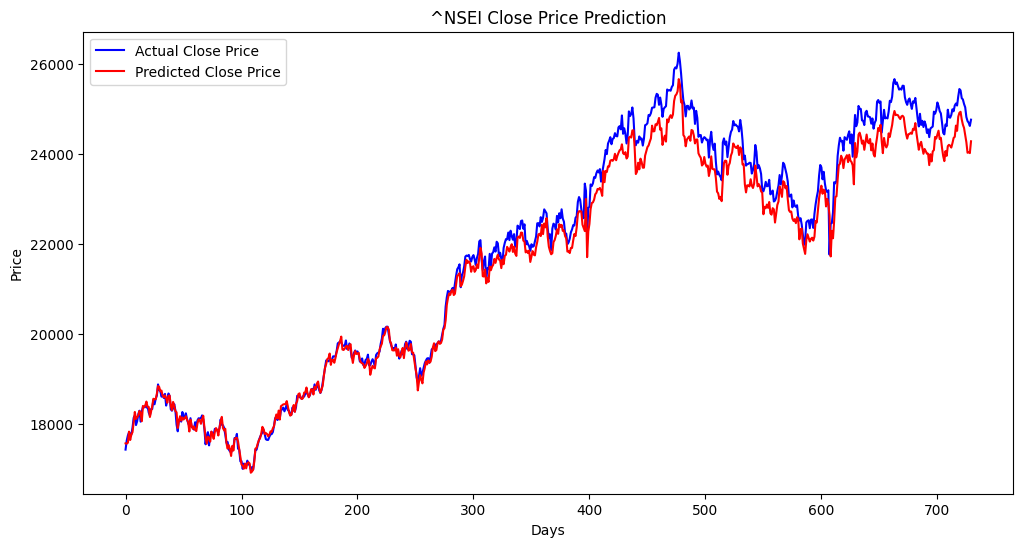

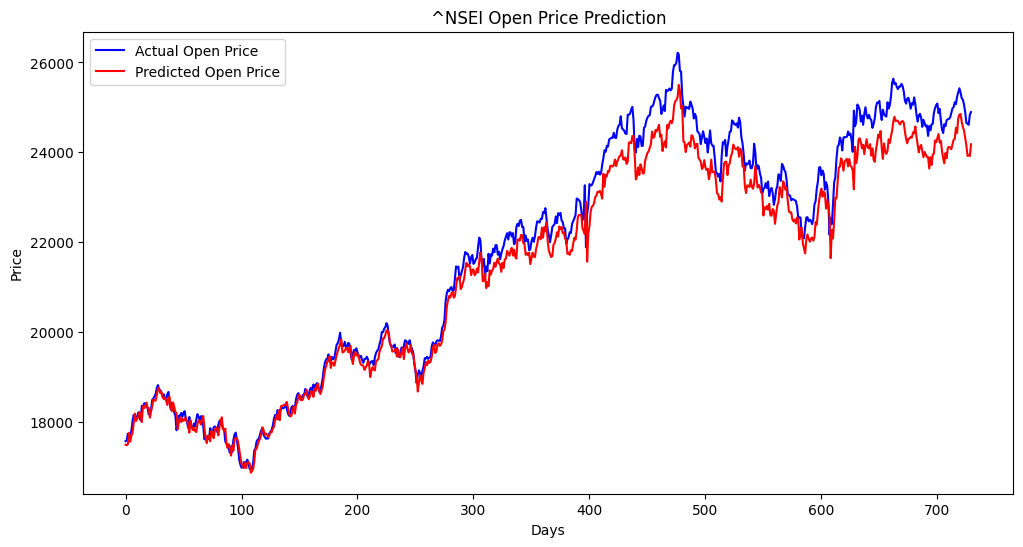

In [51]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 0], 'b', label='Actual Close Price')
plt.plot(y_predicted_final[:, 0], 'r', label='Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Close Price Prediction")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 1], 'b', label='Actual Open Price')
plt.plot(y_predicted_final[:, 1], 'r', label='Predicted Open Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Open Price Prediction")
plt.legend()
plt.show()

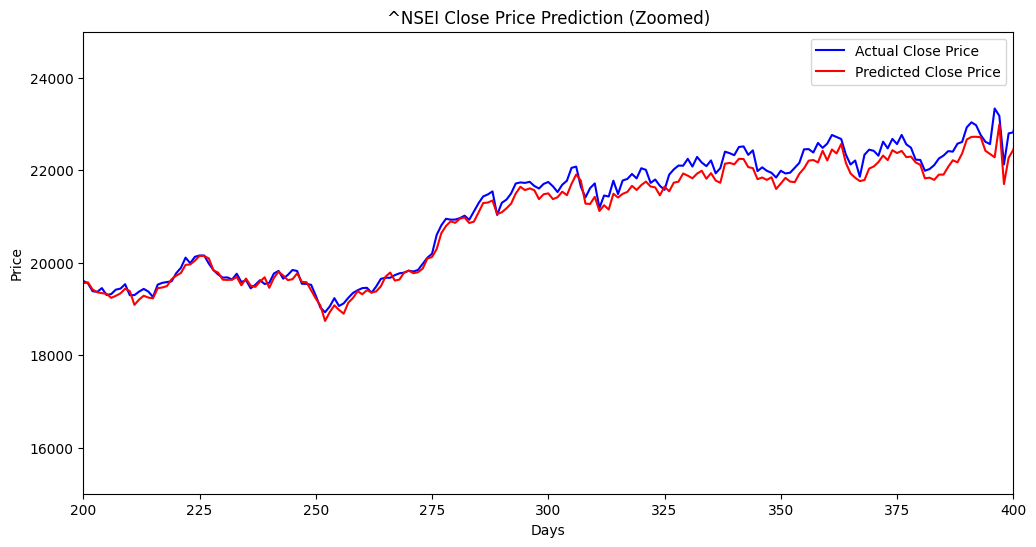

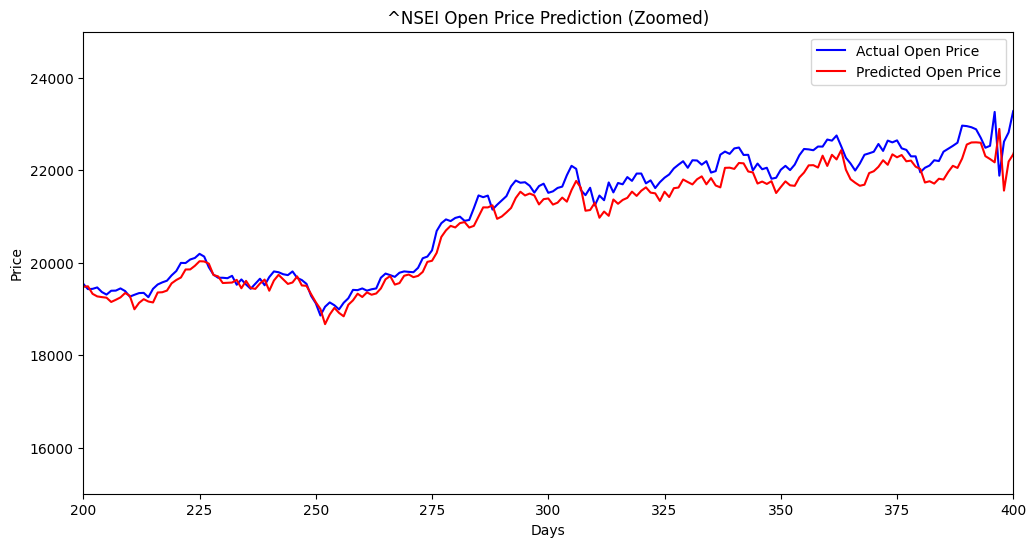

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 0], 'b', label = 'Actual Close Price')
plt.plot(y_predicted_final[:, 0], 'r', label = 'Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(200, 400)
plt.ylim(15000, 25000)
plt.title(f"{ticker} Close Price Prediction (Zoomed)")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 1], 'b', label = 'Actual Open Price')
plt.plot(y_predicted_final[:, 1], 'r', label = 'Predicted Open Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(200, 400)
plt.ylim(15000, 25000)
plt.title(f"{ticker} Open Price Prediction (Zoomed)")
plt.show()

## 10. Model Evaluation

In [53]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Calculate MSE for Close and Open prices separately
mse_close = mean_squared_error(y_test[:, 0], y_predicted[:, 0])
mse_open = mean_squared_error(y_test[:, 1], y_predicted[:, 1])

print(f"Mean Squred Error (MSE) for Close Price: {mse_close}")
print(f"Mean Squred Error (MSE) for Open Price: {mse_open}")

Mean Squred Error (MSE) for Close Price: 0.0017351335350170734
Mean Squred Error (MSE) for Open Price: 0.001081810617622401


In [55]:
# Calculate RMSE for Close and Open prices separately
rmse_close = np.sqrt(mean_squared_error(y_test[:, 0], y_predicted[:, 0]))
rmse_open = np.sqrt(mean_squared_error(y_test[:, 1], y_predicted[:, 1]))

print(f"Root Mean Squred Error (RMSE) for Close Price: {rmse_close}")
print(f"Root Mean Squred Error (RMSE) for Open Price: {rmse_open}")

Root Mean Squred Error (RMSE) for Close Price: 0.04165493410170125
Root Mean Squred Error (RMSE) for Open Price: 0.032890889583931916


In [56]:
# Calculate R-Squared for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"R-Squared for Close Price: {r2_close}")
print(f"R-Squared for Open Price: {r2_open}")

R-Squared for Close Price: 0.9686058305494714
R-Squared for Open Price: 0.9801708238443777


In [57]:
# Print model confidence for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"Model Confidence (R-squared) for Close Price: {(r2_close * 100):.2f}%")
print(f"Model Confidence (R-squared) for Open Price: {(r2_open * 100):.2f}%")

Model Confidence (R-squared) for Close Price: 96.86%
Model Confidence (R-squared) for Open Price: 98.02%
